<a href="https://colab.research.google.com/github/joan1011/Basic-Image-processing-steps-using-opencv-and-python/blob/master/smoothing_and_blurring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

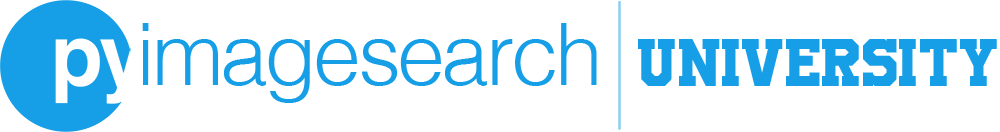

# OpenCV Smoothing and Blurring
### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch University](https://pyimg.co/university)** Jupyter Notebooks!

This notebook is associated with the [OpenCV Smoothing and Blurring](https://www.pyimagesearch.com/2021/04/28/opencv-smoothing-and-blurring/) blog post published on 2021-04-28.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch University Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook. 

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2021 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible by joining PyImageSearch University at https://pyimg.co/university today.*

### Download the code zip file

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/smoothing-and-blurring/smoothing-and-blurring.zip
!unzip -qq smoothing-and-blurring.zip
%cd smoothing-and-blurring

--2021-05-27 12:16:31--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/smoothing-and-blurring/smoothing-and-blurring.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.177.233
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.177.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174310 (170K) [application/zip]
Saving to: ‘smoothing-and-blurring.zip’

smoothing-and-blurr 100%[===================>] 170.22K  --.-KB/s    in 0.1s    

2021-05-27 12:16:31 (1.36 MB/s) - ‘smoothing-and-blurring.zip’ saved [174310/174310]

/content/smoothing-and-blurring


## Blog Post Code

### Import Packages

In [2]:
# import the necessary packages
from matplotlib import pyplot as plt
import argparse
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Average blurring (`cv2.blur`)

In [4]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", type=str, default="adrian.png",
#	help="path to input image")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "Anand.png"
}

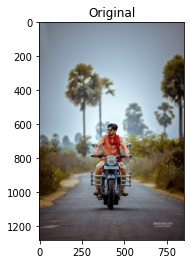

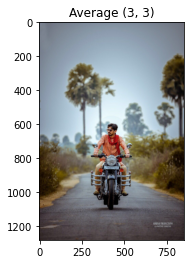

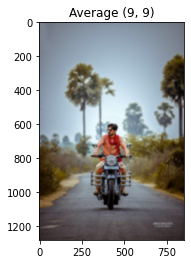

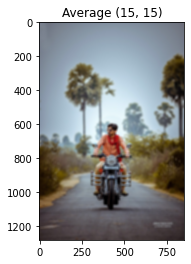

In [5]:
# load the image, display it to our screen, and initialize a list of
# kernel sizes (so we can evaluate the relationship between kernel
# size and amount of blurring)
image = cv2.imread(args["image"])
plt_imshow("Original", image)
kernelSizes = [(3, 3), (9, 9), (15, 15)]

# loop over the kernel sizes
for (kX, kY) in kernelSizes:
	# apply an "average" blur to the image using the current kernel
	# size
	blurred = cv2.blur(image, (kX, kY))
	plt_imshow("Average ({}, {})".format(kX, kY), blurred)

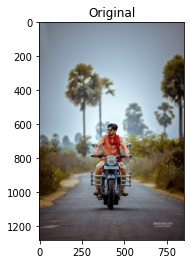

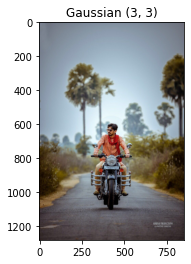

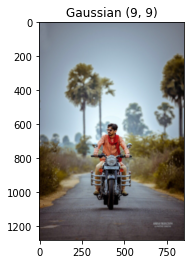

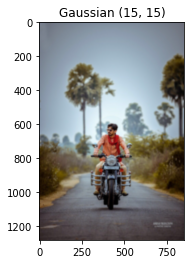

In [6]:
# display the original image
plt_imshow("Original", image)

# loop over the kernel sizes again
for (kX, kY) in kernelSizes:
	# apply a "Gaussian" blur to the image
	blurred = cv2.GaussianBlur(image, (kX, kY), 0)
	plt_imshow("Gaussian ({}, {})".format(kX, kY), blurred)

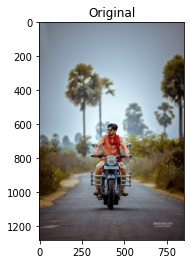

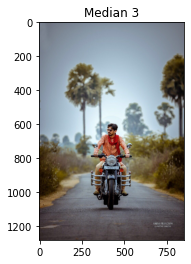

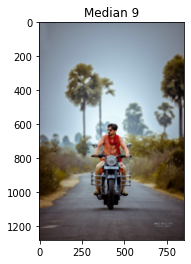

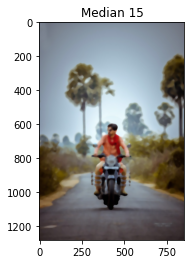

In [7]:
# display the original image
plt_imshow("Original", image)

# loop over the kernel sizes a final time
for k in (3, 9, 15):
	# apply a "median" blur to the image
	blurred = cv2.medianBlur(image, k)
	plt_imshow("Median {}".format(k), blurred)

### Bilateral blurring (`cv2.bilateralFilter`)

In [14]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", type=str, default="adrian.png",
#	help="path to input image")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "Anand.png"
}

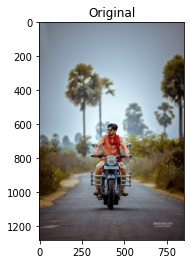

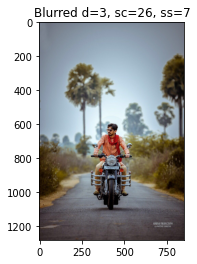

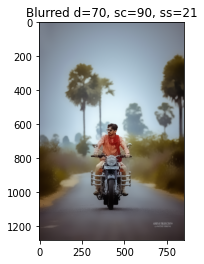

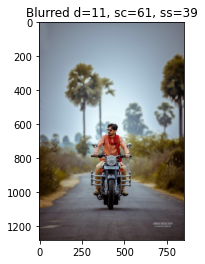

In [16]:
# load the image, display it to our screen, and construct a list of
# bilateral filtering parameters that we are going to explore
image = cv2.imread(args["image"])
plt_imshow("Original", image)
params = [(3 , 26, 7), (70, 90, 21), (11, 61, 39)]

# loop over the diameter, sigma color, and sigma space
for (diameter, sigmaColor, sigmaSpace) in params:
	# apply bilateral filtering to the image using the current set of
	# parameters
	blurred = cv2.bilateralFilter(image, diameter, sigmaColor, sigmaSpace)

	# show the output image and associated parameters
	title = "Blurred d={}, sc={}, ss={}".format(
		diameter, sigmaColor, sigmaSpace)
	plt_imshow(title, blurred)